### Common imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Load the Data

In [2]:
housing = pd.read_csv("housing.csv")

### Take a look at Data structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.size

206400

In [6]:
housing.shape

(20640, 10)

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

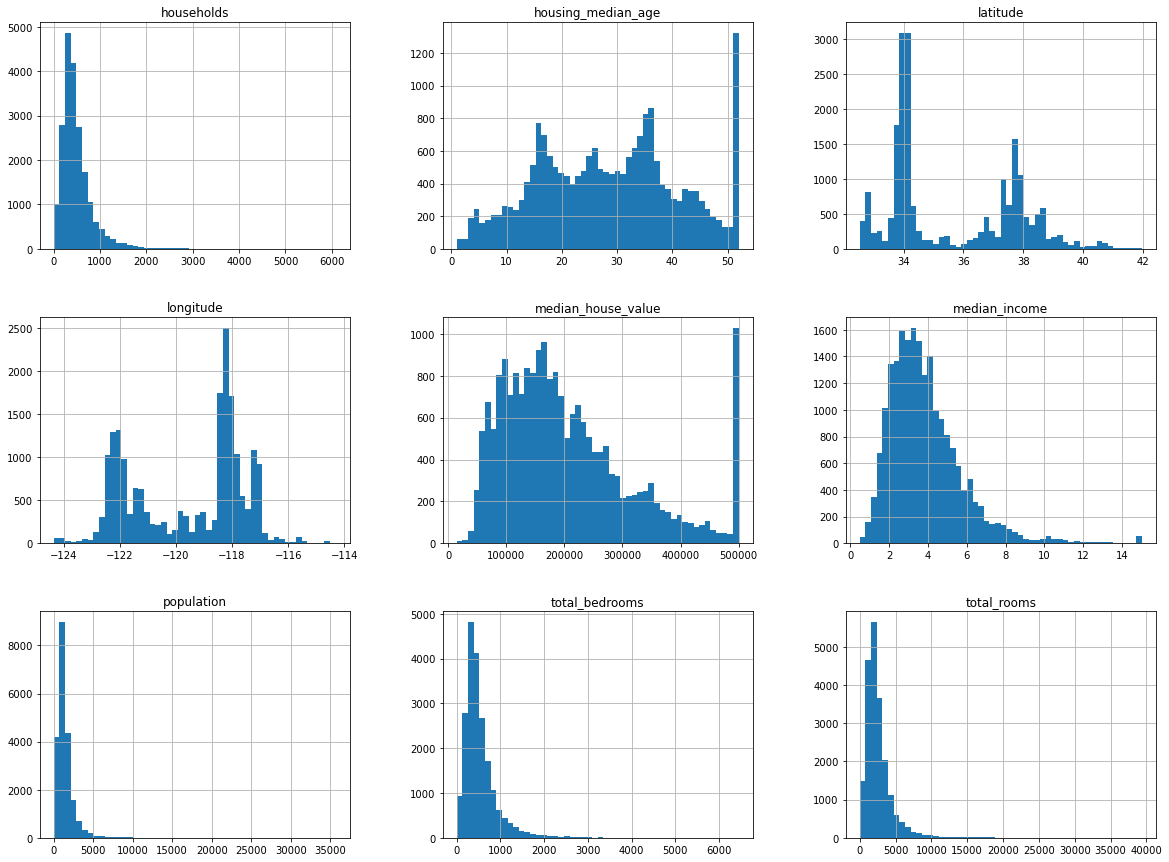

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create Train and Test Set

In [10]:
# to ensure that the test set is representative of the various categories of incomes in the whole dataset
housing["income"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

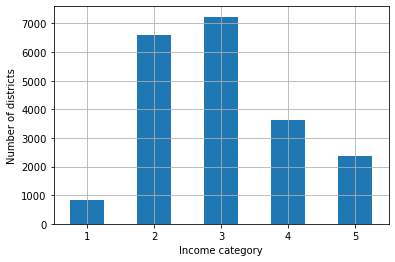

In [11]:
housing["income"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income"], random_state=42)

In [13]:
test_set["income"].value_counts() / len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income, dtype: float64

In [14]:
train_set["total_bedrooms"].isnull().sum()

158

In [15]:
for set_ in (train_set, test_set):
    set_.drop("income", axis=1, inplace=True)

C:\Users\4MAPS4\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Visualizing the Data to Gain Insights

In [16]:
data = train_set.copy()

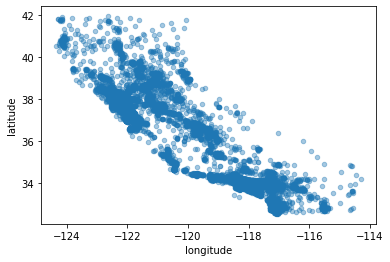

In [17]:
data.plot(kind= "scatter", x="longitude", y="latitude", alpha = 0.4)

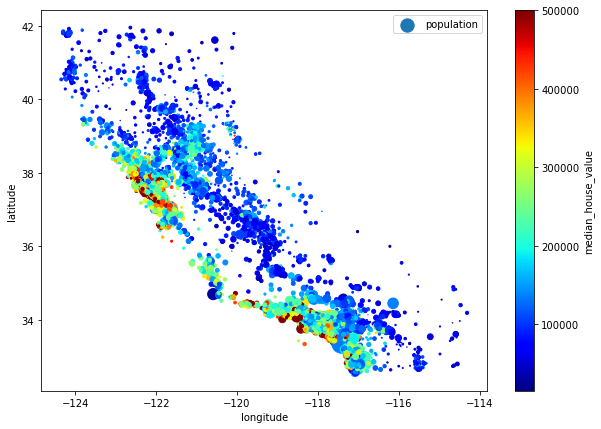

In [18]:
data.plot(kind = "scatter", x = "longitude", y = "latitude",
            s=data["population"]/100, label="population", figsize = (10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
          legend=True, sharex=False
            )
plt.legend()

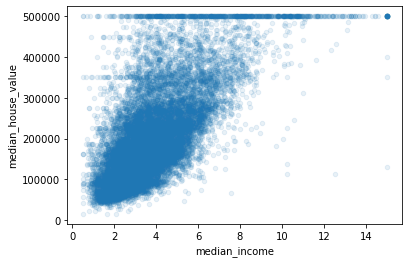

In [19]:
data.plot(kind="scatter", x ="median_income", y = "median_house_value", alpha =0.1)

### Correlations

In [20]:
corr_matrix  = data.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016990EB0>,
      dtype=object)

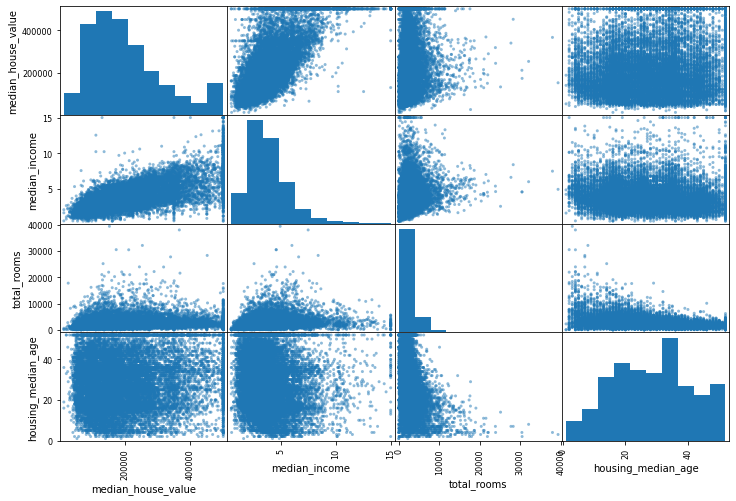

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

## Prepare the Data for Machine Learning Algorithms

In [23]:
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()

### Custom Transformers

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(X_train.values)

In [25]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    X_train.columns.get_loc(c) for c in col_names]

In [26]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(X_train.columns)+["rooms_per_household", "population_per_household"],
    index=X_train.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### Transformation Pipelines

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [29]:
housing_num = X_train.drop("ocean_proximity", axis=1)

In [30]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [31]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X_train)

In [33]:
X_prepared.shape

(16512, 16)

## Training and Evaluating on the Training Set

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_prepared)
lin_rmse = mean_squared_error(y_train, y_pred, squared=False)
lin_rmse

68434.98326992174

In [36]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, y_pred)
lin_mae

49270.860304672526

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
y_pred = tree_reg.predict(X_prepared)
tree_rmse = mean_squared_error(y_train, y_pred, squared=False)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, X_prepared, y_train,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_rmses)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70050.89008693 68426.40337513 70732.67036164 68779.66874377
 72617.58864615 74900.09601678 69681.43644748 70318.43228829
 76384.84300003 69501.61862461]
Mean: 71139.36475908014
Standard deviation: 2521.9731781647615


In [41]:
lin_scores = cross_val_score(lin_reg, X_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66433.51082407 66835.95133395 69433.60512901 74728.75242346
 67998.51974289 71006.36876965 64656.57947607 68221.14397515
 71173.88722569 67492.7746818 ]
Mean: 68798.10935817272
Standard deviation: 2745.3033252086857


In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_prepared, y_train)


RandomForestRegressor(random_state=42)

In [43]:
y_pred = forest_reg.predict(X_prepared)
forest_rmse = mean_squared_error(y_train, y_pred,
                                 squared=False)
forest_rmse

18638.476064384948

In [44]:
forest_scores = cross_val_score(forest_reg, X_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49720.94019957 47633.2931555  49854.28757294 52255.82878005
 49313.85899298 53511.61650367 48661.2156046  47520.16668919
 53282.18296675 50075.07299499]
Mean: 50182.846346024664
Standard deviation: 2048.8377493784624


In [45]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_prepared, y_train)
y_pred = svm_reg.predict(X_prepared)
svm_mse = mean_squared_error(y_train, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111027.3557046392

## Fine-Tune Your Model

### Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],
     'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [49]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,1.6988,0.199193,0.0314,3.072593e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.329745e+09,-2.517661e+09,...,-2.490267e+09,1.331642e+08,1,-3.858893e+08,-3.704071e+08,-3.764700e+08,-3.913257e+08,-3.905448e+08,-3.829274e+08,8.194952e+06
11,2.1366,0.208197,0.0324,5.003964e-03,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.332110e+09,-2.608813e+09,...,-2.497059e+09,1.492153e+08,2,-3.767634e+08,-3.864691e+08,-3.805468e+08,-3.872546e+08,-3.792270e+08,-3.820522e+08,4.118080e+06
5,1.0564,0.095962,0.0260,9.536743e-08,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.361439e+09,-2.636239e+09,...,-2.538004e+09,1.265245e+08,3,-3.911134e+08,-3.826720e+08,-3.864389e+08,-4.036236e+08,-3.968486e+08,-3.921393e+08,7.446374e+06
17,0.5860,0.023332,0.0112,1.469587e-03,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.572236e+09,-2.628864e+09,...,-2.650190e+09,1.042004e+08,4,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
7,0.4776,0.027075,0.0108,1.600075e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.476583e+09,-2.692702e+09,...,-2.696796e+09,2.017094e+08,5,-4.992958e+08,-4.777585e+08,-4.840802e+08,-4.918130e+08,-5.102908e+08,-4.926477e+08,1.141283e+07


### Randomized Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators': randint(low=3, high=50),
                  'max_features': randint(low=2, high=20)}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000016D301F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000016D54040>},
                   random_state=42, scoring='neg_mean_squared_error')

In [51]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.9354,0.086359,0.0368,0.018104,8,31,"{'max_features': 8, 'n_estimators': 31}",-2.328285e+09,-2.598335e+09,-2.684398e+09,-2.316610e+09,-2.540394e+09,-2.493605e+09,1.471173e+08,1
2,1.9416,0.287343,0.0268,0.006242,9,23,"{'max_features': 9, 'n_estimators': 23}",-2.418557e+09,-2.545486e+09,-2.632745e+09,-2.349427e+09,-2.608785e+09,-2.511000e+09,1.097494e+08,2
5,2.0814,0.107198,0.0478,0.006462,5,42,"{'max_features': 5, 'n_estimators': 42}",-2.334626e+09,-2.625387e+09,-2.634774e+09,-2.362649e+09,-2.622273e+09,-2.515942e+09,1.369523e+08,3
3,1.4970,0.170735,0.0242,0.004354,8,21,"{'max_features': 8, 'n_estimators': 21}",-2.377623e+09,-2.656276e+09,-2.727259e+09,-2.353190e+09,-2.581514e+09,-2.539173e+09,1.493791e+08,4
6,1.0280,0.085386,0.0320,0.009252,4,24,"{'max_features': 4, 'n_estimators': 24}",-2.378282e+09,-2.657427e+09,-2.666352e+09,-2.423058e+09,-2.651247e+09,-2.555273e+09,1.271156e+08,5


### Analyze the Best Models

In [52]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [54]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31455194231007777, 'median_income'),
 (0.14667042642185554, 'INLAND'),
 (0.1069293984441502, 'pop_per_hhold'),
 (0.09373624425801781, 'bedrooms_per_room'),
 (0.0759438611297907, 'longitude'),
 (0.07314530635043202, 'latitude'),
 (0.05602280501860923, 'rooms_per_hhold'),
 (0.04183230382870293, 'housing_median_age'),
 (0.018304949834294478, 'total_rooms'),
 (0.017542731695094183, 'population'),
 (0.016520474221597123, 'total_bedrooms'),
 (0.01617985336796375, 'households'),
 (0.013792796702596926, '<1H OCEAN'),
 (0.005868533169775811, 'NEAR OCEAN'),
 (0.002891689363499393, 'NEAR BAY'),
 (6.668388354227165e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [55]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

48076.446997463616
